In [ ]:
# references: 
# https://github.com/dashee87/blogScripts/blob/master/Jupyter/2017-11-20-predicting-cryptocurrency-prices-with-deep-learning.ipynb

In [1]:
import pandas as pd
import html5lib
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [20]:
bitcoin_market_info = pd.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20140101&end="+time.strftime("%Y%m%d"))[0]
bitcoin_market_info = bitcoin_market_info.assign(Date=pd.to_datetime(bitcoin_market_info["Date"]))
bitcoin_market_info.loc[bitcoin_market_info['Volume']=='-', 'Volume'] = 0
bitcoin_market_info['Volume'] = bitcoin_market_info['Volume'].astype('int64')
bitcoin_market_info.columns = bitcoin_market_info.columns.str.replace("*", "")
bitcoin_market_info.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2019-10-04,8259.49,8260.06,8151.24,8205.94,13139456229,147491804056
1,2019-10-03,8390.77,8414.23,8146.44,8259.99,13668823409,148448162840
2,2019-10-02,8344.21,8393.04,8227.70,8393.04,13125712443,150823797662
3,2019-10-01,8299.72,8497.69,8232.68,8343.28,15305343413,149913972768
4,2019-09-30,8104.23,8314.23,7830.76,8293.87,17115474183,149011567415


In [21]:
eth_market_info = pd.read_html("https://coinmarketcap.com/currencies/ethereum/historical-data/?start=20140101&end="+time.strftime("%Y%m%d"))[0]
eth_market_info = eth_market_info.assign(Date=pd.to_datetime(eth_market_info["Date"]))
eth_market_info.loc[eth_market_info['Volume']=='-', 'Volume'] = 0
eth_market_info['Volume'] = eth_market_info['Volume'].astype('int64')
eth_market_info.columns = eth_market_info.columns.str.replace("*", "")
eth_market_info.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2019-10-04,175.24,178.55,173.56,176.99,6248928449,19116991692
1,2019-10-03,180.70,180.80,172.60,175.20,6381403725,18921747814
2,2019-10-02,177.22,180.83,175.33,180.71,6335595250,19514521236
3,2019-10-01,180.21,185.05,175.81,177.34,7676276225,19148222892
4,2019-09-30,170.46,179.87,167.04,179.87,7552915148,19419149343


In [24]:
bitcoin_market_info.columns = [bitcoin_market_info.columns[0]] + ['bt_' + i for i in bitcoin_market_info.columns[1:]]
eth_market_info.columns = [eth_market_info.columns[0]] + ['eth_' + i for i in eth_market_info.columns[1:]]

In [25]:
print(bitcoin_market_info.columns)
print(eth_market_info.columns)

Index(['Date', 'bt_Open', 'bt_High', 'bt_Low', 'bt_Close', 'bt_Volume',
       'bt_Market Cap'],
      dtype='object')
Index(['Date', 'eth_Open', 'eth_High', 'eth_Low', 'eth_Close', 'eth_Volume',
       'eth_Market Cap'],
      dtype='object')


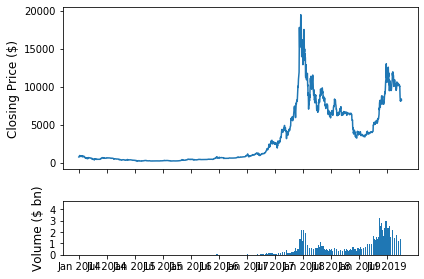

In [37]:
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw = {'height_ratios':[3, 1]})
ax1.set_ylabel('Closing Price ($)', fontsize=12)
ax2.set_ylabel('Volume ($ bn)', fontsize=12)

ax2.set_yticks([int('%d0000000000'%i) for i in range(10)])
ax2.set_yticklabels(range(10))

ax1.set_xticks([datetime.date(i,j,1) for i in range(2014,2020) for j in [1,7]])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(i, j, 1) for i in range(2014, 2020) for j in [1,7]])
ax2.set_xticklabels([datetime.date(i, j, 1).strftime('%b %Y') for i in range(2014, 2020) for j in [1, 7]])

# ax1.plot(bitcoin_market_info['Date'].astype(datetime.datetime), bitcoin_market_info['bt_Open'])
ax1.plot(bitcoin_market_info['Date'], bitcoin_market_info['bt_Open'])
ax2.bar(bitcoin_market_info['Date'].values, bitcoin_market_info['bt_Volume'].values)
fig.tight_layout()
plt.show()

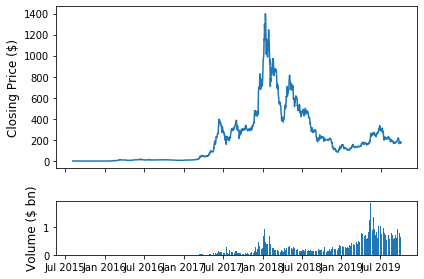

In [39]:
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw = {'height_ratios':[3, 1]})
ax1.set_ylabel('Closing Price ($)', fontsize=12)
ax2.set_ylabel('Volume ($ bn)', fontsize=12)

ax2.set_yticks([int('%d0000000000'%i) for i in range(10)])
ax2.set_yticklabels(range(10))

ax1.set_xticks([datetime.date(i,j,1) for i in range(2014,2020) for j in [1,7]])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(i, j, 1) for i in range(2014, 2020) for j in [1,7]])
ax2.set_xticklabels([datetime.date(i, j, 1).strftime('%b %Y') for i in range(2014, 2020) for j in [1, 7]])

# ax1.plot(bitcoin_market_info['Date'].astype(datetime.datetime), bitcoin_market_info['bt_Open'])
ax1.plot(eth_market_info['Date'], eth_market_info['eth_Open'])
ax2.bar(eth_market_info['Date'].values, eth_market_info['eth_Volume'].values)
fig.tight_layout()
plt.show()

In [43]:
market_info = pd.merge(bitcoin_market_info, eth_market_info, on=['Date'])
market_info.head()

,Date,bt_Open,bt_High,bt_Low,bt_Close,bt_Volume,bt_Market Cap,eth_Open,eth_High,eth_Low,eth_Close,eth_Volume,eth_Market Cap
0,2019-10-04,8259.49,8260.06,8151.24,8205.94,13139456229,147491804056,175.24,178.55,173.56,176.99,6248928449,19116991692
1,2019-10-03,8390.77,8414.23,8146.44,8259.99,13668823409,148448162840,180.70,180.80,172.60,175.20,6381403725,18921747814
2,2019-10-02,8344.21,8393.04,8227.70,8393.04,13125712443,150823797662,177.22,180.83,175.33,180.71,6335595250,19514521236
3,2019-10-01,8299.72,8497.69,8232.68,8343.28,15305343413,149913972768,180.21,185.05,175.81,177.34,7676276225,19148222892
4,2019-09-30,8104.23,8314.23,7830.76,8293.87,17115474183,149011567415,170.46,179.87,167.04,179.87,7552915148,19419149343


In [44]:
for coins in ['bt_', 'eth_']:
    kwargs={coins+'close_off_high': lambda x: 2*(x[coins+'High']-x[coins+'Close'])/(x[coins+'High']-x[coins+'Low'])-1, coins+'volatility': lambda x: (x[coins+'High']-x[coins+'Low'])/(x[coins+'Open'])}
    market_info = market_info.assign(**kwargs)
market_info.head()

,Date,bt_Open,bt_High,bt_Low,bt_Close,bt_Volume,bt_Market Cap,eth_Open,eth_High,eth_Low,eth_Close,eth_Volume,eth_Market Cap,bt_close_off_high,bt_volatility,eth_close_off_high,eth_volatility
0,2019-10-04,8259.49,8260.06,8151.24,8205.94,13139456229,147491804056,175.24,178.55,173.56,176.99,6248928449,19116991692,-0.005330,0.013175,-0.374749,0.028475
1,2019-10-03,8390.77,8414.23,8146.44,8259.99,13668823409,148448162840,180.70,180.80,172.60,175.20,6381403725,18921747814,0.151947,0.031915,0.365854,0.045379
2,2019-10-02,8344.21,8393.04,8227.70,8393.04,13125712443,150823797662,177.22,180.83,175.33,180.71,6335595250,19514521236,-1.000000,0.019815,-0.956364,0.031035
3,2019-10-01,8299.72,8497.69,8232.68,8343.28,15305343413,149913972768,180.21,185.05,175.81,177.34,7676276225,19148222892,0.165315,0.031930,0.668831,0.051274
4,2019-09-30,8104.23,8314.23,7830.76,8293.87,17115474183,149011567415,170.46,179.87,167.04,179.87,7552915148,19419149343,-0.915776,0.059657,-1.000000,0.075267


In [51]:
model_data = market_info[['Date']+[coin+metric for coin in ['bt_', 'eth_'] for metric in ['Close', 'Volume', 'close_off_high', 'volatility']]]
model_data = model_data.sort_values(by='Date')
model_data.head()

,Date,bt_Close,bt_Volume,bt_close_off_high,bt_volatility,eth_Close,eth_Volume,eth_close_off_high,eth_volatility
1519,2015-08-07,279.58,42484800,-0.597015,0.014422,2.770000,164329,0.509804,0.360424
1518,2015-08-08,261.00,58533000,0.969823,0.068707,0.753325,674188,0.962979,0.747410
1517,2015-08-09,265.08,23789600,-0.411945,0.025008,0.701897,532170,0.419789,0.354916
1516,2015-08-10,264.47,20979400,0.155756,0.016687,0.708448,405283,-0.541175,0.130685
1515,2015-08-11,270.39,25433900,-1.000000,0.023833,1.070000,1463100,-0.742911,0.659192


In [64]:

# normalize data: nomrally limit the inputs between -1 to 1
split_date = '2016-01-01'
training_set, test_set = model_data[model_data['Date']<split_date], model_data[model_data['Date']>=split_date]
training_set = training_set.drop('Date', 1)
test_set = test_set.drop('Date', 1)
training_set.head()

,bt_Close,bt_Volume,bt_close_off_high,bt_volatility,eth_Close,eth_Volume,eth_close_off_high,eth_volatility
1519,279.58,42484800,-0.597015,0.014422,2.770000,164329,0.509804,0.360424
1518,261.00,58533000,0.969823,0.068707,0.753325,674188,0.962979,0.747410
1517,265.08,23789600,-0.411945,0.025008,0.701897,532170,0.419789,0.354916
1516,264.47,20979400,0.155756,0.016687,0.708448,405283,-0.541175,0.130685
1515,270.39,25433900,-1.000000,0.023833,1.070000,1463100,-0.742911,0.659192


In [65]:
test_set.head()

,bt_Close,bt_Volume,bt_close_off_high,bt_volatility,eth_Close,eth_Volume,eth_close_off_high,eth_volatility
1372,434.33,36278900,-0.560137,0.020268,0.948024,206062,-0.418477,0.025040
1371,433.44,30096600,0.250597,0.009641,0.937124,255504,0.965898,0.034913
1370,430.01,39633800,-0.173865,0.020827,0.971905,407632,-0.317885,0.060792
1369,433.09,38477500,-0.474265,0.012649,0.954480,346245,-0.057657,0.047943
1368,431.96,34522600,-0.013333,0.010391,0.950176,219833,0.697930,0.025236


In [83]:
# data window is 10. picking small window size to fit more window into the model. downside is tht the model may not have sufficient information to detect complex long term behaviours(if such things exist)

window_len = 10
norm_cols = [coin + metric for coin in ['bt_', 'eth_'] for metric in ['Close', 'Volume']]
LSTM_training_inputs = []
for i in range(len(training_set)-window_len):
    temp_set = training_set[i:(i+window_len)].copy()
    for col in norm_cols:
#       df.loc[:, col] select one col
#       Normalization
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0]-1
    
    LSTM_training_inputs.append(temp_set)
LSTM_training_outputs=(training_set['eth_Close'][window_len:].values/training_set['eth_Close'][:-window_len].values)-1


In [84]:
LSTM_test_inputs = []
for i in range(len(test_set)-window_len):
    temp_set = test_set[i:(i+window_len)].copy()
    for col in norm_cols:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0]-1
    LSTM_test_inputs.append(temp_set)
LSTM_test_outputs = (test_set['eth_Close'][window_len:].values/test_set['eth_Close'][:-window_len].values)-1

In [85]:
LSTM_training_inputs[0]

,bt_Close,bt_Volume,bt_close_off_high,bt_volatility,eth_Close,eth_Volume,eth_close_off_high,eth_volatility
1519,0.000000,0.000000,-0.597015,0.014422,0.000000,0.000000,0.509804,0.360424
1518,-0.066457,0.377740,0.969823,0.068707,-0.728042,3.102672,0.962979,0.747410
1517,-0.051864,-0.440044,-0.411945,0.025008,-0.746608,2.238442,0.419789,0.354916
1516,-0.054045,-0.506190,0.155756,0.016687,-0.744243,1.466290,-0.541175,0.130685
1515,-0.032871,-0.401341,-1.000000,0.023833,-0.613718,7.903480,-0.742911,0.659192
1514,-0.047214,-0.368824,0.650000,0.019217,-0.559567,12.087282,-0.655505,0.383389
1513,-0.055440,-0.348343,0.268437,0.012736,-0.339350,23.759355,-0.650000,0.655738
1512,-0.049717,-0.362332,-0.402337,0.022678,-0.339350,27.217965,0.686275,0.281768
1511,-0.064490,-0.545223,0.906890,0.020224,-0.389892,14.544183,0.225806,0.172222
1510,-0.075363,-0.300526,0.455556,0.020621,-0.433213,20.607811,-0.573770,0.363095


In [86]:
LSTM_training_inputs = [np.array(LSTM_training_input) for LSTM_training_input in LSTM_training_inputs]
LSTM_training_inputs

[array([[ 0.00000000e+00,  0.00000000e+00, -5.97014925e-01,
          1.44220420e-02,  0.00000000e+00,  0.00000000e+00,
          5.09803922e-01,  3.60424028e-01],
        [-6.64568281e-02,  3.77739803e-01,  9.69823101e-01,
          6.87066562e-02, -7.28041516e-01,  3.10267208e+00,
          9.62978504e-01,  7.47410394e-01],
        [-5.18635096e-02, -4.40044439e-01, -4.11944870e-01,
          2.50076593e-02, -7.46607581e-01,  2.23844239e+00,
          4.19788603e-01,  3.54916050e-01],
        [-5.40453537e-02, -5.06190449e-01,  1.55756208e-01,
          1.66867561e-02, -7.44242599e-01,  1.46629019e+00,
         -5.41175462e-01,  1.30685487e-01],
        [-3.28707347e-02, -4.01341186e-01, -1.00000000e+00,
          2.38329424e-02, -6.13718412e-01,  7.90348021e+00,
         -7.42911315e-01,  6.59191597e-01],
        [-4.72136777e-02, -3.68823673e-01,  6.50000000e-01,
          1.92165558e-02, -5.59566787e-01,  1.20872822e+01,
         -6.55505030e-01,  3.83388679e-01],
        [-5.5440

In [87]:
LSTM_training_inputs = np.array(LSTM_training_inputs)
LSTM_training_inputs

array([[[ 0.00000000e+00,  0.00000000e+00, -5.97014925e-01, ...,
          0.00000000e+00,  5.09803922e-01,  3.60424028e-01],
        [-6.64568281e-02,  3.77739803e-01,  9.69823101e-01, ...,
          3.10267208e+00,  9.62978504e-01,  7.47410394e-01],
        [-5.18635096e-02, -4.40044439e-01, -4.11944870e-01, ...,
          2.23844239e+00,  4.19788603e-01,  3.54916050e-01],
        ...,
        [-4.97174333e-02, -3.62331940e-01, -4.02337229e-01, ...,
          2.72179652e+01,  6.86274510e-01,  2.81767956e-01],
        [-6.44895915e-02, -5.45223233e-01,  9.06890130e-01, ...,
          1.45441827e+01,  2.25806452e-01,  1.72222222e-01],
        [-7.53630446e-02, -3.00526306e-01,  4.55555556e-01, ...,
          2.06078112e+01, -5.73770492e-01,  3.63095238e-01]],

       [[ 0.00000000e+00,  0.00000000e+00,  9.69823101e-01, ...,
          0.00000000e+00,  9.62978504e-01,  7.47410394e-01],
        [ 1.56321839e-02, -5.93569439e-01, -4.11944870e-01, ...,
         -2.10650442e-01,  4.19788603e

In [88]:
LSTM_test_inputs = [np.array(LSTM_test_inputs) for LSTM_test_inputs in LSTM_test_inputs]
LSTM_test_inputs = np.array(LSTM_test_inputs)
LSTM_test_inputs

array([[[ 0.00000000e+00,  0.00000000e+00, -5.60137457e-01, ...,
          0.00000000e+00, -4.18477331e-01,  2.50398410e-02],
        [-2.04913315e-03, -1.70410349e-01,  2.50596659e-01, ...,
          2.39937495e-01,  9.65897754e-01,  3.49134105e-02],
        [-9.94635415e-03,  9.24752404e-02, -1.73864895e-01, ...,
          9.78200736e-01, -3.17884625e-01,  6.07919610e-02],
        ...,
        [ 4.35152994e-02,  5.70968249e-01,  2.94196131e-01, ...,
          1.64774679e+00, -8.06716561e-01,  5.52743457e-02],
        [ 3.05758294e-02, -1.10281734e-01,  8.14193548e-01, ...,
          9.81209539e-02, -4.11896506e-01,  1.90207823e-02],
        [ 3.14507402e-02, -7.80067753e-03, -9.19597990e-01, ...,
          8.96943638e-01, -9.38235412e-01,  2.52659156e-02]],

       [[ 0.00000000e+00,  0.00000000e+00,  2.50596659e-01, ...,
          0.00000000e+00,  9.65897754e-01,  3.49134105e-02],
        [-7.91343669e-03,  3.16886293e-01, -1.73864895e-01, ...,
          5.95403594e-01, -3.17884625e

In [92]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

def build_model(inputs, output_size, neurons, active_function="linear", dropout=0.25, loss="mae", optimizer="adam"):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(active_function))
    model.compile(loss=loss, optimizer = optimizer)
    return model

In [93]:
np.random.seed(202)
eth_model = build_model(LSTM_training_inputs, output_size=1, neurons = 20)
LSTM_training_outputs = (training_set['eth_Close'][window_len:].values/training_set['eth_Close'][:-window_len].values)-1
eth_history = eth_model.fit(LSTM_training_inputs, LSTM_training_outputs, 
                            epochs=50, batch_size=1, verbose=2, shuffle=True)

Epoch 1/50
 - 1s - loss: 0.2201
Epoch 2/50
 - 1s - loss: 0.1503
Epoch 3/50
 - 0s - loss: 0.1213
Epoch 4/50
 - 0s - loss: 0.1065
Epoch 5/50
 - 0s - loss: 0.1040
Epoch 6/50
 - 0s - loss: 0.0916
Epoch 7/50
 - 0s - loss: 0.0906
Epoch 8/50
 - 0s - loss: 0.0944
Epoch 9/50
 - 1s - loss: 0.0843
Epoch 10/50
 - 1s - loss: 0.0759
Epoch 11/50
 - 1s - loss: 0.0709
Epoch 12/50
 - 1s - loss: 0.0786
Epoch 13/50
 - 1s - loss: 0.0803
Epoch 14/50
 - 1s - loss: 0.0687
Epoch 15/50
 - 1s - loss: 0.0703
Epoch 16/50
 - 1s - loss: 0.0814
Epoch 17/50
 - 1s - loss: 0.0710
Epoch 18/50
 - 1s - loss: 0.0797
Epoch 19/50
 - 1s - loss: 0.0594
Epoch 20/50
 - 1s - loss: 0.0666
Epoch 21/50
 - 1s - loss: 0.0640
Epoch 22/50
 - 1s - loss: 0.0651
Epoch 23/50
 - 1s - loss: 0.0665
Epoch 24/50
 - 1s - loss: 0.0672
Epoch 25/50
 - 1s - loss: 0.0702
Epoch 26/50
 - 1s - loss: 0.0760
Epoch 27/50
 - 1s - loss: 0.0618
Epoch 28/50
 - 0s - loss: 0.0583
Epoch 29/50
 - 0s - loss: 0.0699
Epoch 30/50
 - 0s - loss: 0.0599
Epoch 31/50
 - 0s -

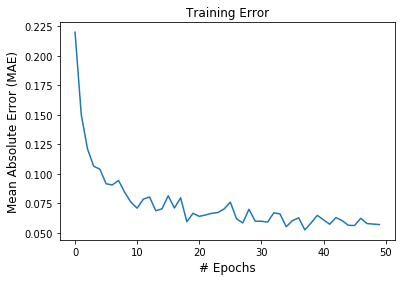

In [95]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(eth_history.epoch, eth_history.history['loss'])
ax1.set_title('Training Error')

if eth_model.loss == 'mae':
    ax1.set_ylabel('Mean Absolute Error (MAE)', fontsize=12)
else:
    ax1.set_ylabel("Model Loss", fontsize=12)
ax1.set_xlabel("# Epochs", fontsize=12)
plt.show()

In [96]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

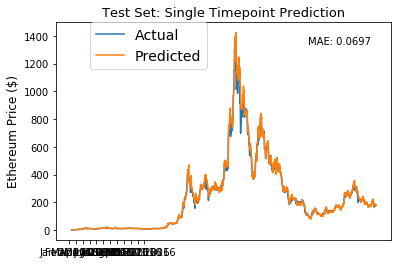

In [103]:
fig, ax1 = plt.subplots(1, 1)
ax1.set_xticks([datetime.date(2016, i+1, 1) for i in range(12)])
ax1.set_xticklabels([datetime.date(2016, i+1, 1).strftime('%b %d %Y') for i in range(12)])
ax1.plot(model_data[model_data['Date']>=split_date]['Date'][window_len:], test_set['eth_Close'][window_len:], label='Actual')
ax1.plot(model_data[model_data['Date']>=split_date]['Date'][window_len:], ((np.transpose(eth_model.predict(LSTM_test_inputs))+1) * test_set['eth_Close'].values[:-window_len])[0], label='Predicted')
ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(eth_model.predict(LSTM_test_inputs))+1)-\
            (test_set['eth_Close'].values[window_len:])/(test_set['eth_Close'].values[:-window_len]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.set_title('Test Set: Single Timepoint Prediction',fontsize=13)
ax1.set_ylabel('Ethereum Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.show()

In [104]:
# Takeaway knowledge
# https://github.com/dashee87/blogScripts/blob/master/Jupyter/2017-11-20-predicting-cryptocurrency-prices-with-deep-learning.ipynb
# Single point predictions can be deceptive
# 5 days predcition
# Compare two models: run model multiple times, then compare the absolute model errors

In [ ]:
# ----------------------------- A NEW LSTM METHOD -------------------------------------------------------------------

In [119]:
lstm_bitcoin_price = pd.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130101&end="+time.strftime("%Y%m%d"))[0]
lstm_bitcoin_price = lstm_bitcoin_price.assign(Date=pd.to_datetime(lstm_bitcoin_price["Date"]))
lstm_bitcoin_price.loc[lstm_bitcoin_price['Volume']=='-', 'Volume'] = 0
lstm_bitcoin_price['Volume'] = lstm_bitcoin_price['Volume'].astype('int64')
lstm_bitcoin_price.columns = lstm_bitcoin_price.columns.str.replace("*", "")
lstm_bitcoin_price.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2019-10-11,8585.26,8721.78,8316.18,8321.76,19604381101,149685618275
1,2019-10-10,8585.28,8625.27,8471.93,8586.47,17618660671,154430515160
2,2019-10-09,8229.84,8627.71,8169.30,8595.74,19384942333,154579656110
3,2019-10-08,8246.85,8332.72,8185.76,8228.78,15592264032,147966069982
4,2019-10-07,7989.12,8308.45,7905.77,8245.62,18009742607,148252589805


In [120]:
kwargs = {'OHLC_avg': lambda x: (x['Open'] + x['High'] + x['Low'] + x['Close'])/4}
lstm_bitcoin_price = lstm_bitcoin_price.assign(**kwargs)
lstm_bitcoin_price = lstm_bitcoin_price.sort_values(by='Date')
lstm_bitcoin_price.head()

,Date,Open,High,Low,Close,Volume,Market Cap,OHLC_avg
2357,2013-04-28,135.30,135.98,132.10,134.21,0,1488566728,134.3975
2356,2013-04-29,134.44,147.49,134.00,144.54,0,1603768865,140.1175
2355,2013-04-30,144.00,146.93,134.05,139.00,0,1542813125,140.9950
2354,2013-05-01,139.00,139.89,107.72,116.99,0,1298954594,125.9000
2353,2013-05-02,116.38,125.60,92.28,105.21,0,1168517495,109.8675


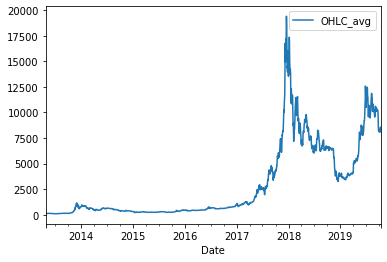

In [121]:
lstm_bitcoin_price.plot(x='Date', y="OHLC_avg")

In [135]:
start_date = lstm_bitcoin_price['Date'].values[0]
start_date
# data_length_in_years = data_length_in_days / 365
# data_length_in_years * 0.8 + 2013

numpy.datetime64('2013-04-28T00:00:00.000000000')

In [134]:
end_date = lstm_bitcoin_price['Date'].values[-1]
end_date

numpy.datetime64('2019-10-11T00:00:00.000000000')

In [136]:
data_length_in_days = (lstm_bitcoin_price.Date.values[-1] - lstm_bitcoin_price.Date.values[0]).astype('timedelta64[D]')
data_length_in_days

numpy.timedelta64(2357,'D')

In [138]:
split_point = lstm_bitcoin_price['Date'].values[0] + data_length_in_days * 0.8
split_point

numpy.datetime64('2018-06-26T00:00:00.000000000')

In [146]:
lstm_bitcoin_price_idx = lstm_bitcoin_price.set_index(["Date"], drop=True)
lstm_bitcoin_price_data = lstm_bitcoin_price_idx[['OHLC_avg']]
lstm_bitcoin_price_data_train = lstm_bitcoin_price_data[:split_point]
lstm_bitcoin_price_data_test = lstm_bitcoin_price_data[split_point:]
print(lstm_bitcoin_price_data_train.head())
print(lstm_bitcoin_price_data_test.head())

            OHLC_avg
Date                
2013-04-28  134.3975
2013-04-29  140.1175
2013-04-30  140.9950
2013-05-01  125.9000
2013-05-02  109.8675
             OHLC_avg
Date                 
2018-06-26  6182.7625
2018-06-27  6118.5950
2018-06-28  6025.0150
2018-06-29  6053.4600
2018-06-30  6324.4875


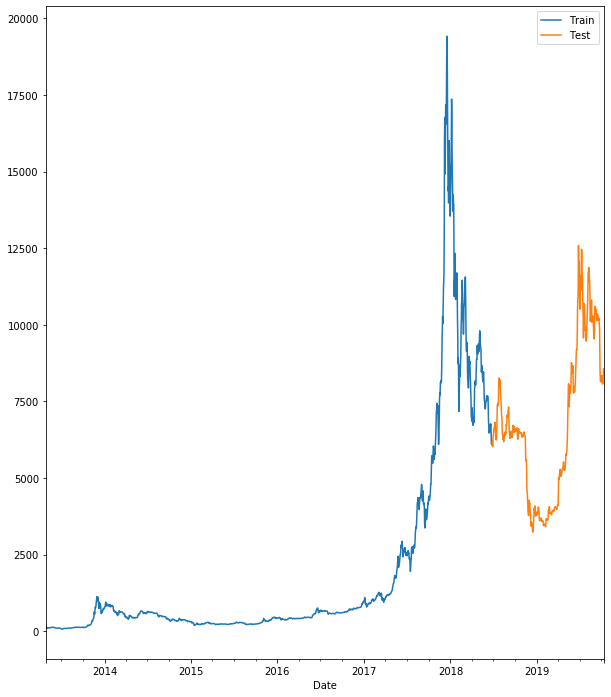

In [147]:
ax = lstm_bitcoin_price_data_train.plot(figsize=(10, 12))
lstm_bitcoin_price_data_test.plot(ax=ax)
plt.legend(['Train', 'Test'])
plt.show()

In [149]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
lstm_bitcoin_price_data_train_sc = sc.fit_transform(lstm_bitcoin_price_data_train)
lstm_bitcoin_price_data_test_sc = sc.fit_transform(lstm_bitcoin_price_data_test)
print(lstm_bitcoin_price_data_train_sc)
print(lstm_bitcoin_price_data_test_sc)

[[0.00332032]
 [0.00361593]
 [0.00366128]
 ...
 [0.31146486]
 [0.31767294]
 [0.31590096]]
[[0.31507434]
 [0.3082114 ]
 [0.2982027 ]
 [0.30124499]
 [0.33023231]
 [0.33615993]
 [0.34857936]
 [0.35556476]
 [0.35891855]
 [0.36331006]
 [0.36362129]
 [0.37490996]
 [0.38284323]
 [0.37787738]
 [0.35321847]
 [0.33565912]
 [0.32651996]
 [0.32162042]
 [0.32317552]
 [0.3300815 ]
 [0.35428533]
 [0.40601281]
 [0.44262992]
 [0.44619735]
 [0.44899097]
 [0.44184114]
 [0.44948831]
 [0.46415055]
 [0.51666816]
 [0.53789119]
 [0.51738795]
 [0.51525851]
 [0.5280127 ]
 [0.53183335]
 [0.52427548]
 [0.50515863]
 [0.473817  ]
 [0.46765675]
 [0.45294451]
 [0.42796447]
 [0.40630506]
 [0.40440129]
 [0.39195218]
 [0.34969168]
 [0.34228168]
 [0.33488371]
 [0.32350333]
 [0.32904887]
 [0.33300641]
 [0.3154837 ]
 [0.33135265]
 [0.33239598]
 [0.34443198]
 [0.34842295]
 [0.34440952]
 [0.33948217]
 [0.3380129 ]
 [0.34873284]
 [0.34430069]
 [0.3621079 ]
 [0.37503991]
 [0.37192943]
 [0.38028223]
 [0.40192612]
 [0.40844306]


In [158]:
lstm_bt_train_sc_df = pd.DataFrame(lstm_bitcoin_price_data_train_sc, columns=['Y'], index=lstm_bitcoin_price_data_train.index)
lstm_bt_test_sc_df = pd.DataFrame(lstm_bitcoin_price_data_test_sc, columns=['Y'], index=lstm_bitcoin_price_data_test.index)

lstm_bt_train_sc_df['X_{}'.format(1)]=lstm_bt_train_sc_df['Y'].shift(1)
lstm_bt_test_sc_df['X_{}'.format(1)]=lstm_bt_test_sc_df['Y'].shift(1)

X_train = lstm_bt_train_sc_df.dropna().drop('Y', axis=1)
y_train = lstm_bt_train_sc_df.dropna().drop('X_1', axis=1)

X_test = lstm_bt_test_sc_df.dropna().drop('Y', axis=1)
y_test = lstm_bt_test_sc_df.dropna().drop('X_1', axis=1)

X_train = X_train.as_matrix()
y_train = y_train.as_matrix()

X_test = X_test.as_matrix()
y_test = y_test.as_matrix()

print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[0.00332032]
 [0.00361593]
 [0.00366128]
 ...
 [0.31355158]
 [0.31146486]
 [0.31767294]]
[[0.00361593]
 [0.00366128]
 [0.00288117]
 ...
 [0.31146486]
 [0.31767294]
 [0.31590096]]
[[0.31507434]
 [0.3082114 ]
 [0.2982027 ]
 [0.30124499]
 [0.33023231]
 [0.33615993]
 [0.34857936]
 [0.35556476]
 [0.35891855]
 [0.36331006]
 [0.36362129]
 [0.37490996]
 [0.38284323]
 [0.37787738]
 [0.35321847]
 [0.33565912]
 [0.32651996]
 [0.32162042]
 [0.32317552]
 [0.3300815 ]
 [0.35428533]
 [0.40601281]
 [0.44262992]
 [0.44619735]
 [0.44899097]
 [0.44184114]
 [0.44948831]
 [0.46415055]
 [0.51666816]
 [0.53789119]
 [0.51738795]
 [0.51525851]
 [0.5280127 ]
 [0.53183335]
 [0.52427548]
 [0.50515863]
 [0.473817  ]
 [0.46765675]
 [0.45294451]
 [0.42796447]
 [0.40630506]
 [0.40440129]
 [0.39195218]
 [0.34969168]
 [0.34228168]
 [0.33488371]
 [0.32350333]
 [0.32904887]
 [0.33300641]
 [0.3154837 ]
 [0.33135265]
 [0.33239598]
 [0.34443198]
 [0.34842295]
 [0.34440952]
 [0.33948217]
 [0.3380129 ]
 [0.34873284]
 [0.3443

/anaconda3/envs/forDA/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]
/anaconda3/envs/forDA/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/anaconda3/envs/forDA/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()
/anaconda3/envs/forDA/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [159]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K

In [172]:
# 1 Hidden layer with 1 neuron and tanh function
K.clear_session()
model=Sequential()
model.add(Dense(1, input_shape=(X_test.shape[1], ), activation='tanh', kernel_initializer='lecun_uniform'))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
1885/1885 [==============================] - 0s 86us/step - loss: 0.0614
Epoch 2/20
1885/1885 [==============================] - 0s 48us/step - loss: 0.0475
Epoch 3/20
1885/1885 [==============================] - 0s 44us/step - loss: 0.0411
Epoch 4/20
1885/1885 [==============================] - 0s 50us/step - loss: 0.0358
Epoch 5/20
1885/1885 [==============================] - 0s 47us/step - loss: 0.0311
Epoch 6/20
1885/1885 [==============================] - 0s 49us/step - loss: 0.0268
Epoch 7/20
1885/1885 [==============================] - 0s 48us/step - loss: 0.0230
Epoch 8/20
1885/1885 [==============================] - 0s 50us/step - loss: 0.0197
Epoch 9/20
1885/1885 [==============================] - 0s 54us/step - loss: 0.0168
Epoch 10/20
1885/1885 [==============================] - 0s 47us/step - loss: 0.0143
Epoch 11/20
1885/1885 [==============================] - 0s 49us/step - loss: 0.0121
Epoch 12/20
1885/1885 [==============================] - 0s 47us/step - lo

R-Squared: 0.816709


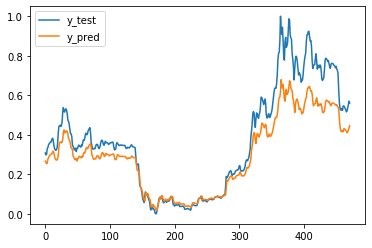

In [173]:
# R-squared is not stable. changes from 0.46to 0.94
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)

plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['y_test', 'y_pred'])
print('R-Squared: %f'%(r2_score(y_test, y_pred)))

In [185]:
# Hidden layers with 50 neuorons each and ReLu activation function
K.clear_session()
model = Sequential()
model.add(Dense(50, input_shape=(X_test.shape[1], ), activation='relu', kernel_initializer='lecun_uniform'))
model.add(Dense(50, input_shape=(X_test.shape[1], ), activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
1885/1885 [==============================] - 0s 123us/step - loss: 0.0016
Epoch 2/20
1885/1885 [==============================] - 0s 59us/step - loss: 1.1907e-04
Epoch 3/20
1885/1885 [==============================] - 0s 58us/step - loss: 1.1388e-04
Epoch 4/20
1885/1885 [==============================] - 0s 58us/step - loss: 1.4665e-04
Epoch 5/20
1885/1885 [==============================] - 0s 63us/step - loss: 1.0891e-04
Epoch 6/20
1885/1885 [==============================] - 0s 66us/step - loss: 1.3003e-04
Epoch 7/20
1885/1885 [==============================] - 0s 66us/step - loss: 1.3799e-04
Epoch 8/20
1885/1885 [==============================] - 0s 68us/step - loss: 1.7736e-04
Epoch 9/20
1885/1885 [==============================] - 0s 60us/step - loss: 1.4520e-04
Epoch 10/20
1885/1885 [==============================] - 0s 61us/step - loss: 1.6743e-04
Epoch 11/20
1885/1885 [==============================] - 0s 54us/step - loss: 1.3116e-04
Epoch 12/20
1885/1885 [==========

R-Squared: 0.993260


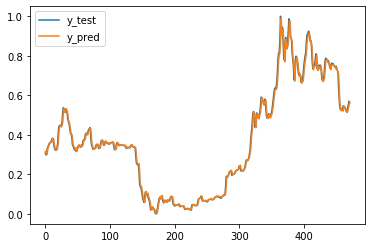

In [186]:
#Ran multi times. The R squared error is something btween 0.97 and 0.98
y_pred = model.predict(X_test)
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['y_test', 'y_pred'])
print('R-Squared: %f'%(r2_score(y_test, y_pred)))

In [ ]:
# -------------------------------- ARIMA ---------------------------------------------------

In [302]:
lstm_bitcoin_price_idx = lstm_bitcoin_price.set_index(["Date"], drop=True)
arima_data = lstm_bitcoin_price_idx[['OHLC_avg']]
arima_data_train = lstm_bitcoin_price_data[:split_point]
arima_data_test = lstm_bitcoin_price_data[split_point:]
print(arima_data_train.head())
print(arima_data_test.head())

            OHLC_avg
Date                
2013-04-28  134.3975
2013-04-29  140.1175
2013-04-30  140.9950
2013-05-01  125.9000
2013-05-02  109.8675
             OHLC_avg
Date                 
2018-06-26  6182.7625
2018-06-27  6118.5950
2018-06-28  6025.0150
2018-06-29  6053.4600
2018-06-30  6324.4875


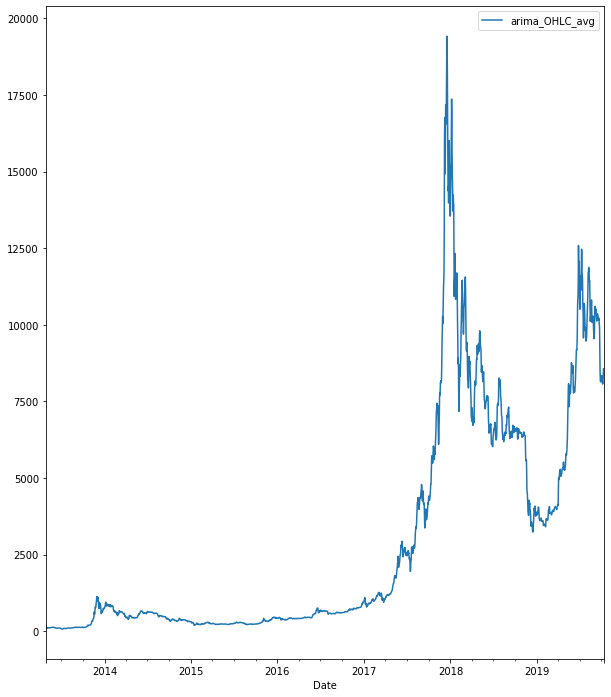

In [303]:
ax = arima_data.plot(figsize=(10, 12))
plt.legend(['arima_OHLC_avg'])
plt.show()

In [304]:
#Determine rolling statistics
rolmean = arima_data.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = arima_data.rolling(window=12).std()
print(rolmean,rolstd)

               OHLC_avg
Date                   
2013-04-28          NaN
2013-04-29          NaN
2013-04-30          NaN
2013-05-01          NaN
2013-05-02          NaN
...                 ...
2019-10-07  8205.191667
2019-10-08  8204.694792
2019-10-09  8225.948958
2019-10-10  8254.297083
2019-10-11  8282.266667

[2358 rows x 1 columns]               OHLC_avg
Date                  
2013-04-28         NaN
2013-04-29         NaN
2013-04-30         NaN
2013-05-01         NaN
2013-05-02         NaN
...                ...
2019-10-07   90.863247
2019-10-08   90.585034
2019-10-09  105.441380
2019-10-10  144.326011
2019-10-11  154.564263

[2358 rows x 1 columns]


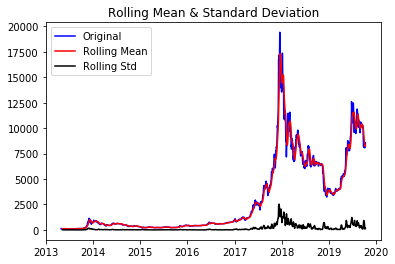

In [305]:
#Plot rolling statistics
original = plt.plot(arima_data, color='blue', label='Original')
# A moving average is commonly used with time series data to smooth out short-term fluctuations and highlight longer-term trends or cycles.
roll_mean = plt.plot(rolmean, color='red', label='Rolling Mean')
# Moving Standard Deviation is a statistical measurement of market volatility. It makes no predictions of market direction, but it may serve as a confirming indicator. 
roll_standard = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [306]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf

In [307]:
def test_stationarity(timeseries):
    moving_avg = timeseries.rolling(window=12).mean()
    moving_std = timeseries.rolling(window=12).std()
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(moving_avg, color='red', label='Rolling Mean')
    std = plt.plot(moving_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Results of Dicky Fuller Test:')
    dftest = adfuller(timeseries['OHLC_avg'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

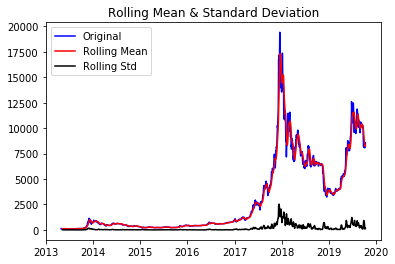

Results of Dicky Fuller Test:
Test Statistic                   -1.497684
p-value                           0.534657
#Lags Used                       27.000000
Number of Observations Used    2330.000000
Critical Value (1%)              -3.433160
Critical Value (5%)              -2.862781
Critical Value (10%)             -2.567431
dtype: float64


In [308]:
test_stationarity(arima_data)

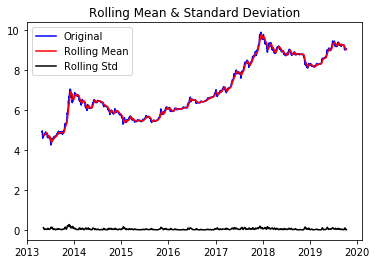

Results of Dicky Fuller Test:
Test Statistic                   -1.000952
p-value                           0.752917
#Lags Used                       26.000000
Number of Observations Used    2331.000000
Critical Value (1%)              -3.433158
Critical Value (5%)              -2.862781
Critical Value (10%)             -2.567430
dtype: float64


In [309]:
# logged data
arima_data_logScale = np.log(arima_data)
test_stationarity(arima_data_logScale)

In [310]:
# 𝑙𝑜𝑔𝑠𝑐𝑎𝑙𝑒𝐿=𝑠𝑡𝑎𝑡𝑖𝑜𝑛𝑎𝑟𝑦𝑝𝑎𝑟𝑡(𝐿1)+𝑡𝑟𝑒𝑛𝑑(𝐿𝑇) 
# 𝑚𝑜𝑣𝑖𝑛𝑔𝑎𝑣𝑔𝑜𝑓𝑙𝑜𝑔𝑠𝑐𝑎𝑙𝑒𝐴=𝑠𝑡𝑎𝑡𝑖𝑜𝑛𝑎𝑟𝑦𝑝𝑎𝑟𝑡(𝐴1)+𝑡𝑟𝑒𝑛𝑑(𝐴𝑇) 
# 𝑟𝑒𝑠𝑢𝑙𝑡𝑠𝑒𝑟𝑖𝑒𝑠𝑅=𝐿−𝐴=(𝐿1+𝐿𝑇)−(𝐴1+𝐴𝑇)=(𝐿1−𝐴1)+(𝐿𝑇−𝐴𝑇)
arima_data_after_minus = arima_data_logScale - moving_avg
arima_data_after_minus.dropna(inplace=True)
arima_data_after_minus.head(12)

,OHLC_avg
Date,
2013-05-09,-0.043936
2013-05-10,0.001218
2013-05-11,0.019173
2013-05-12,0.029164
2013-05-13,0.045291
2013-05-14,0.027590
2013-05-15,-0.015416
2013-05-16,0.017753
2013-05-17,0.053163


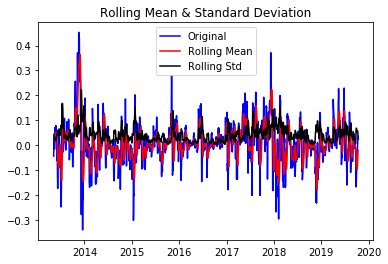

Results of Dicky Fuller Test:
Test Statistic                -1.029180e+01
p-value                        3.554215e-18
#Lags Used                     8.000000e+00
Number of Observations Used    2.338000e+03
Critical Value (1%)           -3.433150e+00
Critical Value (5%)           -2.862777e+00
Critical Value (10%)          -2.567429e+00
dtype: float64


In [311]:
test_stationarity(arima_data_after_minus)

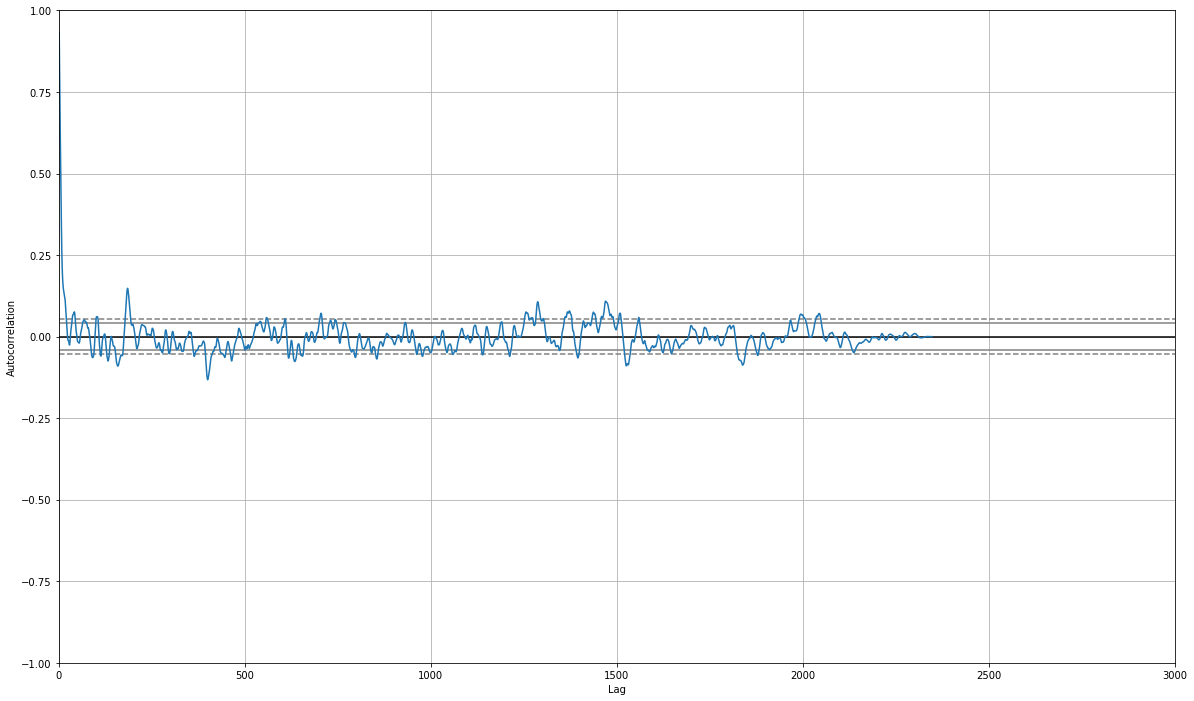

In [327]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
ax = autocorrelation_plot(arima_data_after_minus)
ax.set_xlim([0, 3000])
fig = pyplot.gcf()
fig.set_size_inches(20,12)
pyplot.show()
# p values is 20 because y reaches critical boundry at 20

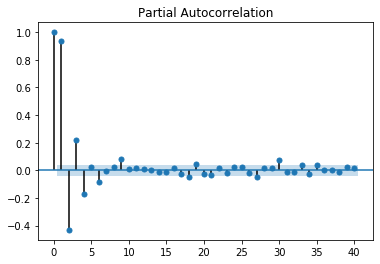

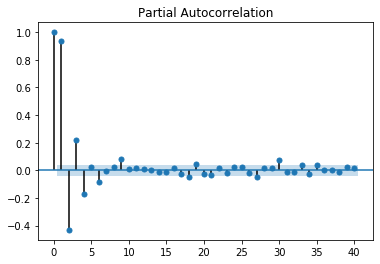

In [331]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(arima_data_after_minus, lags=40)

In [333]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(arima_data_after_minus,  order=(20,1,0))

/anaconda3/envs/forDA/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/envs/forDA/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


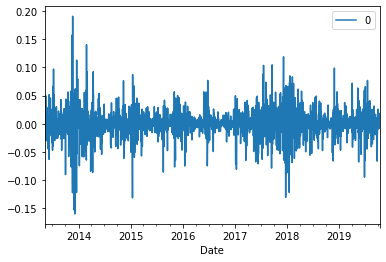

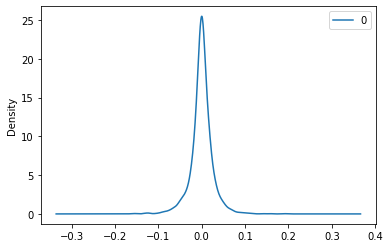

                 0
count  2346.000000
mean      0.000018
std       0.025514
min      -0.160034
25%      -0.010045
50%       0.000468
75%       0.011382
max       0.190766


In [334]:
model_fit = model.fit(disp=0)
# plot residual erros
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())
# Residual’s mean is non-zero suggesting that there is bias with the model prediction.

In [312]:
arima_data_after_minus.head()

,OHLC_avg
Date,
2013-05-09,-0.043936
2013-05-10,0.001218
2013-05-11,0.019173
2013-05-12,0.029164
2013-05-13,0.045291


/anaconda3/envs/forDA/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


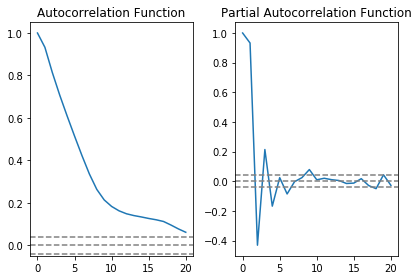

In [293]:
# ACF & PACF
lag_acf = acf(arima_data_after_minus, nlags=20)
lag_pacf = pacf(arima_data_after_minus, nlags=20, method='ols')
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(arima_data_after_minus)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(arima_data_after_minus)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(arima_data_after_minus)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(arima_data_after_minus)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()    

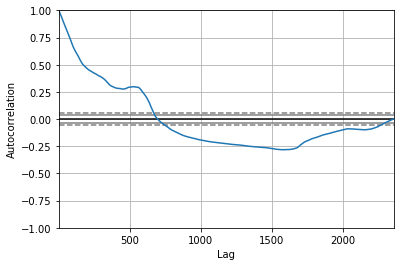

In [294]:
# Auto correlation plot on original data
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(arima_data)
plt.show()

In [295]:
def adf_test(timeseries):
    print("Result of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Oberservations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [296]:
adf_test(arima_data['OHLC_avg'])

Result of Dickey-Fuller Test:
Test Statistic                     -1.497684
p-value                             0.534657
Lags Used                          27.000000
Number of Oberservations Used    2330.000000
Critical Value (1%)                -3.433160
Critical Value (5%)                -2.862781
Critical Value (10%)               -2.567431
dtype: float64


In [297]:
from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries):
    print('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic', 'p-value', 'Lags Used'])
    for key, value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print(kpss_output)

In [298]:
kpss_test(arima_data['OHLC_avg'])

Results of KPSS Test:
Test Statistic            5.317551
p-value                   0.010000
Lags Used                27.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/anaconda3/envs/forDA/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/anaconda3/envs/forDA/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1708: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


/anaconda3/envs/forDA/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


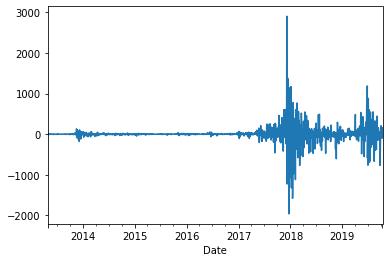

In [299]:
# Differencing
arima_data_diff = arima_data
arima_data_diff['OHLC_avg'] = arima_data_diff['OHLC_avg'] - arima_data_diff['OHLC_avg'].shift(1)
arima_data_diff['OHLC_avg'].dropna(inplace=True)

arima_data_diff['OHLC_avg'].plot()

In [300]:
adf_test(arima_data_diff['OHLC_avg'])

Result of Dickey-Fuller Test:
Test Statistic                  -9.191276e+00
p-value                          2.120054e-15
Lags Used                        2.600000e+01
Number of Oberservations Used    2.330000e+03
Critical Value (1%)             -3.433160e+00
Critical Value (5%)             -2.862781e+00
Critical Value (10%)            -2.567431e+00
dtype: float64


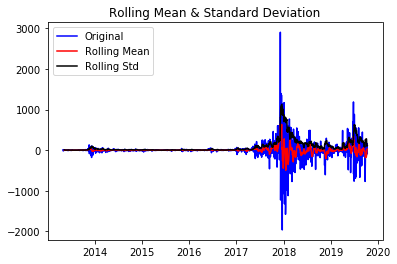

Results of Dicky Fuller Test:
Test Statistic                -9.191276e+00
p-value                        2.120054e-15
#Lags Used                     2.600000e+01
Number of Observations Used    2.330000e+03
Critical Value (1%)           -3.433160e+00
Critical Value (5%)           -2.862781e+00
Critical Value (10%)          -2.567431e+00
dtype: float64


In [301]:
test_stationarity(arima_data_diff)

In [ ]:
# ACF & PACF
lag_acf = acf(arima_data_after_minus, nlags=20)
lag_pacf = pacf(arima_data_after_minus, nlags=20, method='ols')
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(arima_data_after_minus)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(arima_data_after_minus)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(arima_data_after_minus)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(arima_data_after_minus)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()    

/anaconda3/envs/forDA/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/envs/forDA/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


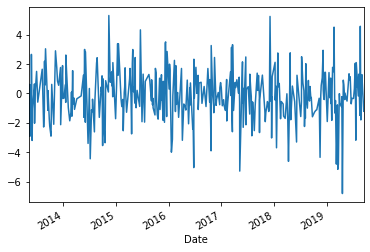

In [251]:
import numpy as np
arima_data_diff['OHLC_avg_log'] = np.log(arima_data_diff['OHLC_avg'])
arima_data_diff['OHLC_avg_log_diff'] = arima_data_diff['OHLC_avg_log'] - arima_data_diff['OHLC_avg_log'].shift(1)
arima_data_diff['OHLC_avg_log_diff'].dropna(inplace=True)
arima_data_diff['OHLC_avg_log_diff'].plot()

In [252]:
adf_test(arima_data_diff['OHLC_avg_log_diff'])

Result of Dickey-Fuller Test:
Test Statistic                   -19.900820
p-value                            0.000000
Lags Used                          0.000000
Number of Oberservations Used    383.000000
Critical Value (1%)               -3.447540
Critical Value (5%)               -2.869116
Critical Value (10%)              -2.570806
dtype: float64


In [ ]:
# ACF & PACF
lag_acf = acf(arima_data_after_minus, nlags=20)
lag_pacf = pacf(arima_data_after_minus, nlags=20, method='ols')
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(arima_data_after_minus)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(arima_data_after_minus)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(arima_data_after_minus)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(arima_data_after_minus)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout() 